# V09

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 3.3 Aufgaben
1. Machen Sie sich klar, dass die Reihenfolge der Spalten von A und die
der Koeffizienten in p konsistent, d.h. zueinander passend, sein müssen.
2. Das untenstehende Programm löst beispielhaft die Normalengleichung.
Implementieren und verstehen Sie es.

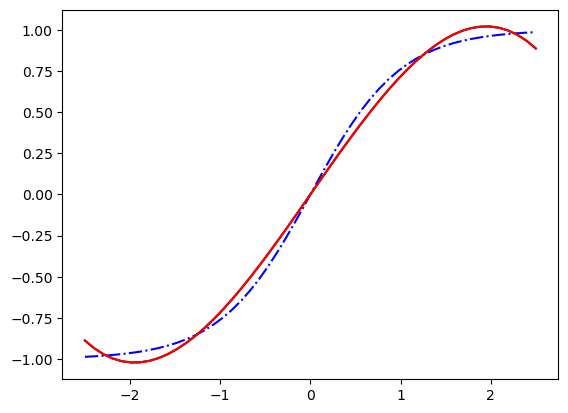

In [3]:
# Generiere kompliziertere Beispielfunktion
x = np.linspace( -2.5, 2.5, 50 )
y = np.tanh(x).reshape(-1,1)
# Ansatz: p3(x) = a + b*x + c*x^2 + d*x^3, p=(a,b,c,d)^T
A = np.array([ np.ones(len(x)), x, x**2, x**3 ]).T
# Normalengleichung loesen:
p = np.linalg.solve( A.T@A, A.T@y )
yy = p[0] + p[1]*x + p[2]*x**2 + p[3]*x**3
# Graphische Darstellung
plt.figure(2)
plt.plot( x, y, 'b-.' ,x ,yy , 'k-' )
# Vergleich mit polyfit
pp = np.polyfit( x, y, 3 )
# stimmt mit obiger Loesung ueberein, aber Koeffizienten
# sind in umgekehrter Reihenfolge (warum ?)
plt.plot( x, np.polyval( pp, x ), 'r-' )
plt.show()

In [4]:
print(A)

[[ 1.00000000e+00 -2.50000000e+00  6.25000000e+00 -1.56250000e+01]
 [ 1.00000000e+00 -2.39795918e+00  5.75020825e+00 -1.37887647e+01]
 [ 1.00000000e+00 -2.29591837e+00  5.27124115e+00 -1.21023394e+01]
 [ 1.00000000e+00 -2.19387755e+00  4.81309871e+00 -1.05593492e+01]
 [ 1.00000000e+00 -2.09183673e+00  4.37578092e+00 -9.15341928e+00]
 [ 1.00000000e+00 -1.98979592e+00  3.95928780e+00 -7.87817470e+00]
 [ 1.00000000e+00 -1.88775510e+00  3.56361933e+00 -6.72724056e+00]
 [ 1.00000000e+00 -1.78571429e+00  3.18877551e+00 -5.69424198e+00]
 [ 1.00000000e+00 -1.68367347e+00  2.83475635e+00 -4.77280406e+00]
 [ 1.00000000e+00 -1.58163265e+00  2.50156185e+00 -3.95655190e+00]
 [ 1.00000000e+00 -1.47959184e+00  2.18919200e+00 -3.23911062e+00]
 [ 1.00000000e+00 -1.37755102e+00  1.89764681e+00 -2.61410530e+00]
 [ 1.00000000e+00 -1.27551020e+00  1.62692628e+00 -2.07516107e+00]
 [ 1.00000000e+00 -1.17346939e+00  1.37703040e+00 -1.61590303e+00]
 [ 1.00000000e+00 -1.07142857e+00  1.14795918e+00 -1.22995627e

## 5.1 Aufgaben

### 1. Gegeben seien die Datenpunkte:

| x | 0 | 1 | 2 | 3 | 4 |
|---|---|---|---|---|---|
| y | 6 | 12 | 30 | 80 | 140 |

Gesucht sind die reellen Parameter \( a \) und \( c \), so dass die Funktion
\[ f(x) = a \cdot \exp(x) + c \]
die Daten bestmöglich im Sinne der kleinsten Fehlerquadratsumme approximiert.

### Aufgabenstellung:

**Formulieren Sie diese Aufgabe als Ausgleichsproblem \( \|A \cdot x - b\|^2 \).**
**Lösen Sie dann das Problem über die zugehörige Normalengleichung.**
**Plotten Sie \( f \) und die Daten zur optischen Kontrolle.**
**Überlegen Sie sich auch, warum die Funktion `np.polyfit` in diesem Fall nicht anwendbar ist.**

a: 2.4868839196544967, c: 10.929535953198798


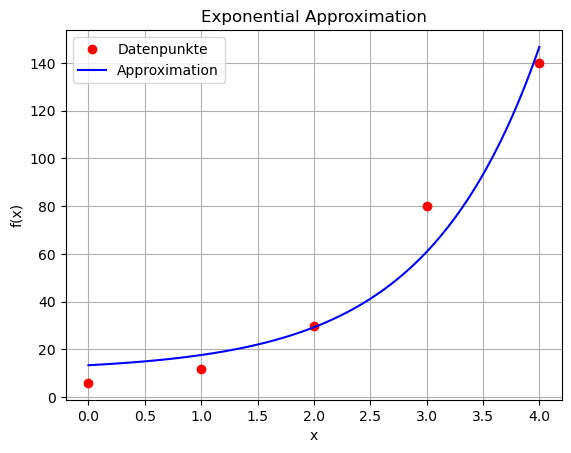

In [7]:
x = np.array([0, 1, 2, 3, 4])
y = np.array([6, 12, 30, 80, 140])

# Ansatz: f(x) = a * exp(x) + c
A = np.array([np.exp(x), np.ones(len(x))]).T
b = y.reshape(-1, 1)
# Normalengleichung lösen
p = np.linalg.solve(A.T @ A, A.T @ b)
a, c = p[0][0], p[1][0]
print(f"a: {a}, c: {c}")
# Plotten der Funktion und der Datenpunkte
x_plot = np.linspace(0, 4, 100)
y_plot = a * np.exp(x_plot) + c
plt.figure()
plt.plot(x, y, 'ro', label='Datenpunkte')
plt.plot(x_plot, y_plot, 'b-', label='Approximation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Exponential Approximation')
plt.legend()
plt.grid()
plt.show()